# **Raw tables discovery**

# Learn about tables and their contents

During this first pass, we briefly and individually discover each of the 9 + 1 tables and bring out the following information on each of them:
* the list of its fields, and for each of them :
* the number `n` of values
* the number `n_u` of unique values
* the number `n_na` of missing values (including the hidden)
* the filling rate `fr`
* the ratio `vr` of the number of unique values to the number of values

This first qualitative information allows us to discover the nature of the data, to evaluate the quality of the data, to distinguish the types of fields (obvious simple primary keys and foreign keys, monetary and temporal quantitative variables, qualitative variables of geolocation and categorization).

Then we focus on determining primary keys (simple or compound), and then forming dataframes indexed by those keys. These dataframes will then serve as the basis for the merge (join) operations.

A first derived information is the exact quantification of unique entities (objects).

In [1]:
from home_credit.load import load_raw_table
from pepper.utils import show_discrete_stats

## Main tables

### Metadata: `HomeCredit_columns_description`

**TODO** : produire programmatiquement les rappels de définitions ci-après!

Ainsi, plus besoin d'un copier-coller dans chaque notebook !

Definition:
* This file contains descriptions for the columns in the various data files.

Définition :
* *Ce fichier contient les descriptions des colonnes des différents fichiers de données.*

#### Direct load

In [2]:
table_name = "HomeCredit_columns_description"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,None
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,None
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,None
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,None
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,None
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,None


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_HomeCredit_columns_description,,,,,,
Unnamed: 0,219,219,0,1.000000,1.000000,int64
Table,219,7,0,1.000000,0.031963,object
Row,219,196,0,1.000000,0.894977,object
Description,219,163,0,1.000000,0.744292,object
Special,86,7,133,0.392694,0.081395,object


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_homecredit_columns_description_2023_04_17_15_13_01_315071.png)


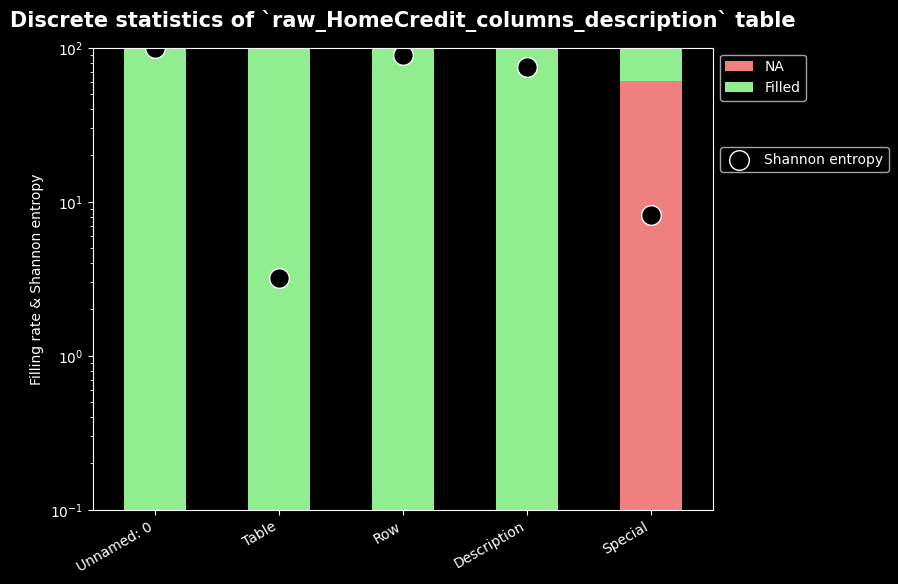

In [3]:
show_discrete_stats(table, f"raw_{table_name}")

### Central table (training set): `application_train`

Definition:
* This is the main table, broken into two files for Train (with `TARGET`) and Test (without `TARGET`).
* Static data for all applications. One row represents one loan in our data sample.
* $86.3$ % ($307\,511$) of $356\,255$ samples.

Définition :
* *C'est la table principale, divisée en deux fichiers pour l'entraînement (avec `TARGET`) et le test (sans `TARGET`).*
* *Données statiques pour toutes les demandes de prêts. Une ligne représente un prêt dans notre échantillon de données.*
* *$86.3$ % ($307\,511$) de $356\,255$ échantillons.*

#### Direct load

In [4]:
table_name = "application_train"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_application_train,,,,,,
SK_ID_CURR,307511,307511,0,1.000000,1.000000,int64
TARGET,307511,2,0,1.000000,0.000007,int64
NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
CODE_GENDER,307511,3,0,1.000000,0.000010,object
FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_application_train_2023_04_17_15_13_18_963870.png)


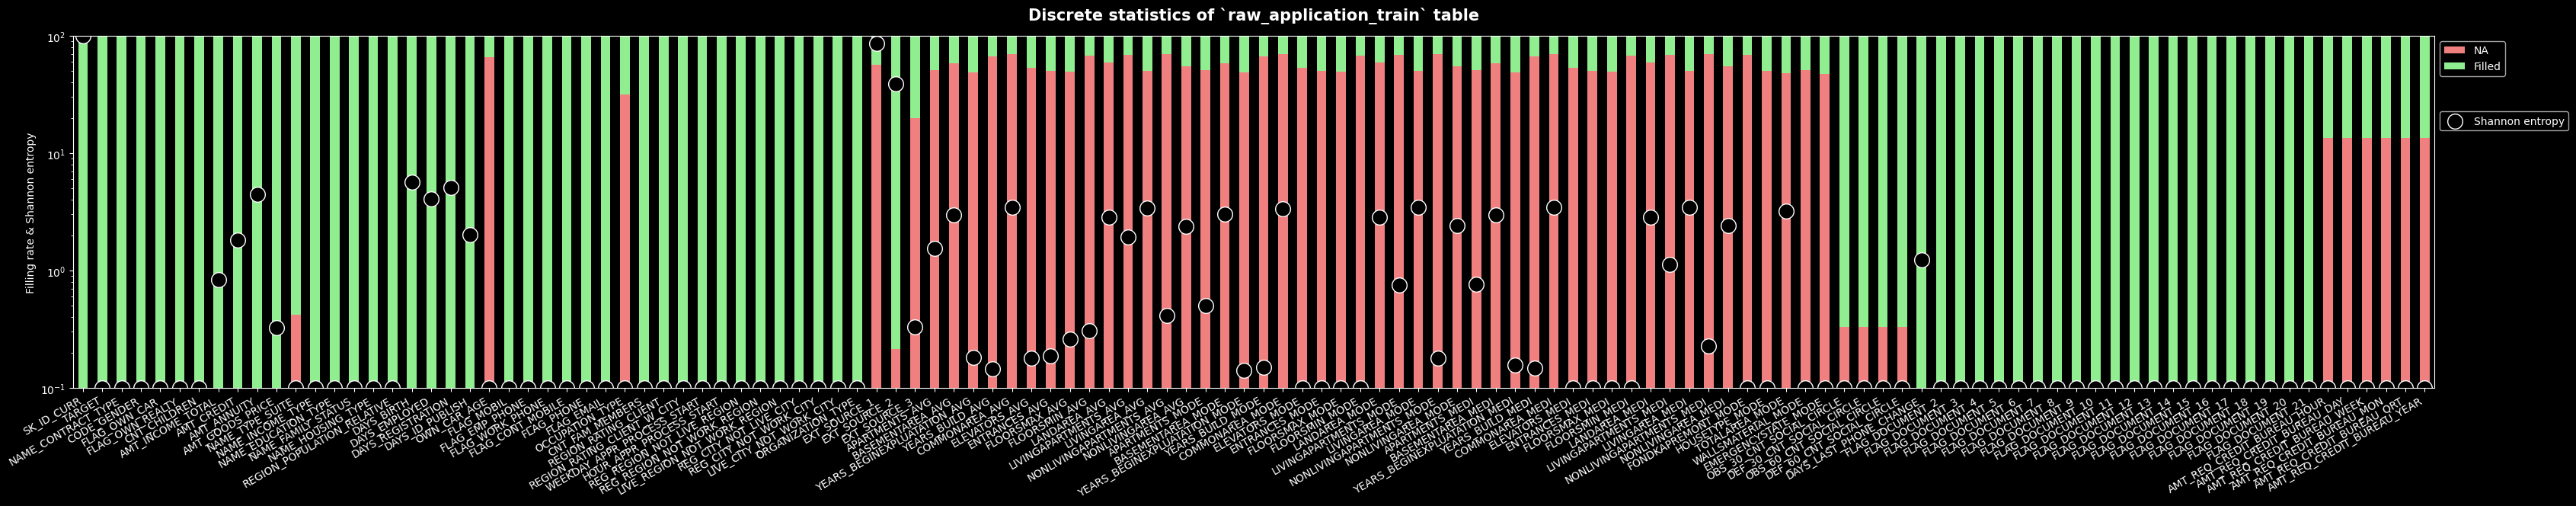

In [5]:
show_discrete_stats(table, f"raw_{table_name}", ratio=5)

### Central table (test set):  `application_test`

Definition:
* This is the main table, broken into two files for Train (with `TARGET`) and Test (without `TARGET`).
* Static data for all applications. One row represents one loan in our data sample.
* $13.7$ % ($48\,744$) of $356\,255$ samples.

Définition :
* *C'est la table principale, divisée en deux fichiers pour l'entraînement (avec `TARGET`) et le test (sans `TARGET`).*
* *Données statiques pour toutes les demandes de prêts. Une ligne représente un prêt dans notre échantillon de données.*
* *$13.7$ % ($48\,744$) de $356\,255$ échantillons.*

#### Direct load

In [6]:
table_name = "application_test"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_application_test,,,,,,
SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64
NAME_CONTRACT_TYPE,48744,2,0,1.000000,0.000041,object
CODE_GENDER,48744,2,0,1.000000,0.000041,object
FLAG_OWN_CAR,48744,2,0,1.000000,0.000041,object
FLAG_OWN_REALTY,48744,2,0,1.000000,0.000041,object
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,42695,3,6049,0.875903,0.000070,float64
AMT_REQ_CREDIT_BUREAU_WEEK,42695,3,6049,0.875903,0.000070,float64
AMT_REQ_CREDIT_BUREAU_MON,42695,7,6049,0.875903,0.000164,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_application_test_2023_04_17_15_13_36_989005.png)


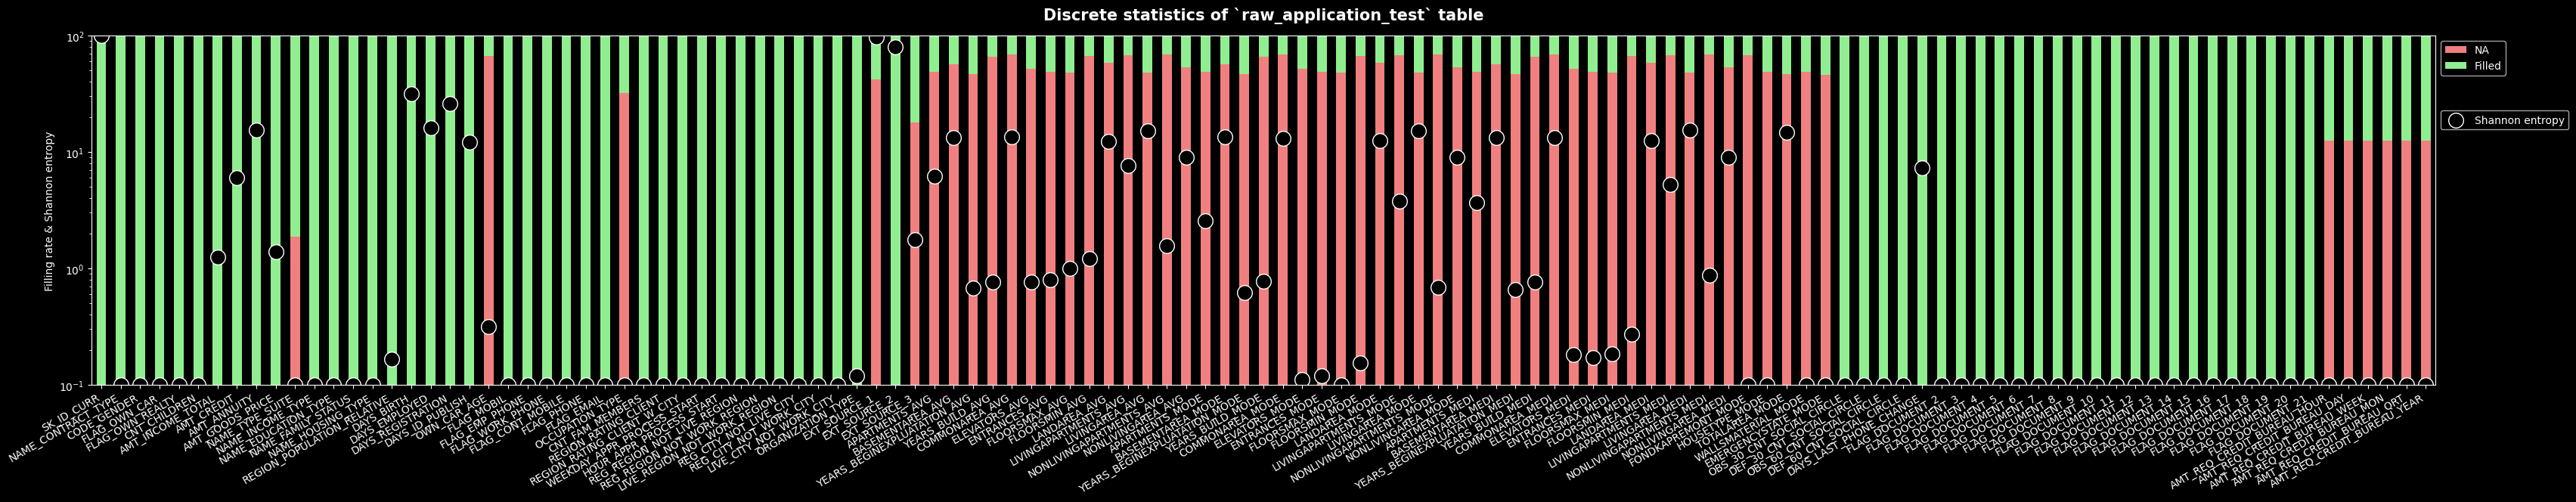

In [7]:
show_discrete_stats(table, f"raw_{table_name}", ratio=5)

### Kaggle's `sample_submission` file

As samples as `application_test` table : $48\,744$.

#### Direct load

In [8]:
table_name = "sample_submission"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\sample_submission.pqt


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_sample_submission,,,,,,
SK_ID_CURR,48744,48744,0,1.0,1.000000,int64
TARGET,48744,1,0,1.0,0.000021,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_sample_submission_2023_04_17_15_13_51_865778.png)


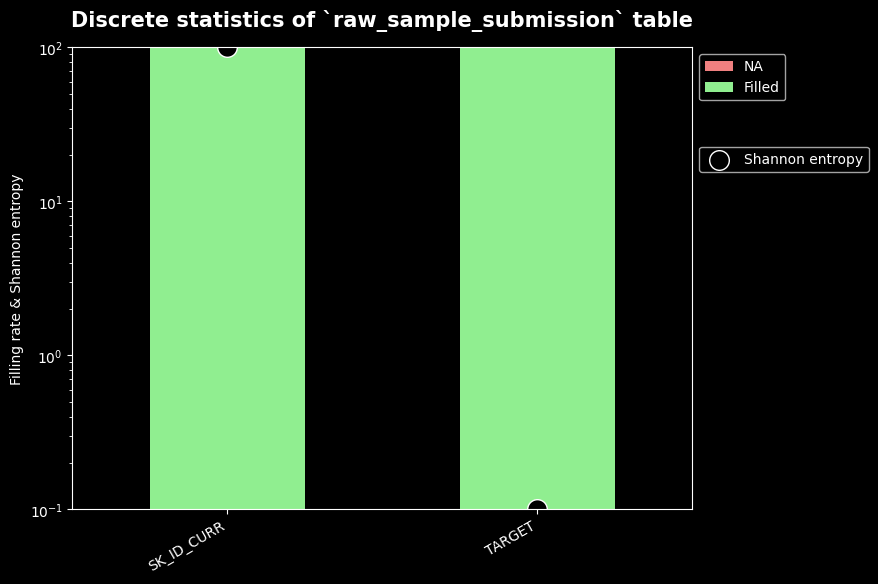

In [9]:
show_discrete_stats(table, f"raw_{table_name}")

## Out of Home Credit Client history

The Credit Bureau is the Home Credit's Information Agency that collects external data about its clients.

### `bureau`

Definition:
* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

Définition :
* *Tous les précédents crédits des clients fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).*
* *Pour chaque prêt dans notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le bureau de crédit avant la date de la demande.*

#### Direct load

In [10]:
table_name = "bureau"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_bureau,,,,,,
SK_ID_CURR,1716428,305811,0,1.000000,0.178167,int64
SK_ID_BUREAU,1716428,1716428,0,1.000000,1.000000,int64
CREDIT_ACTIVE,1716428,4,0,1.000000,0.000002,object
CREDIT_CURRENCY,1716428,4,0,1.000000,0.000002,object
DAYS_CREDIT,1716428,2923,0,1.000000,0.001703,int64
CREDIT_DAY_OVERDUE,1716428,942,0,1.000000,0.000549,int64
DAYS_CREDIT_ENDDATE,1610875,14096,105553,0.938504,0.008751,float64
DAYS_ENDDATE_FACT,1082775,2917,633653,0.630830,0.002694,float64
AMT_CREDIT_MAX_OVERDUE,591940,68251,1124488,0.344867,0.115301,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_bureau_2023_04_17_15_14_06_972354.png)


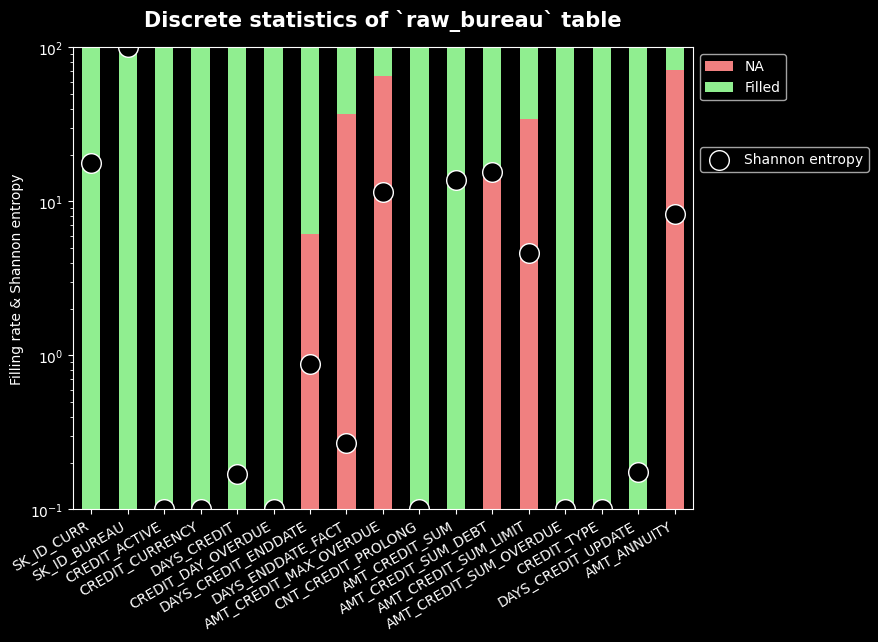

In [11]:
show_discrete_stats(table, f"raw_{table_name}")

### `bureau_balance`

Definition:
* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

Définition :
* *Soldes mensuels des précédents crédits signalés au bureau de crédit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que la table a (# prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons une historique observable pour les crédits précédents) de lignes.*

#### Direct load

In [12]:
table_name = "bureau_balance"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_bureau_balance,,,,,,
SK_ID_BUREAU,27299925,817395,0,1.0,2.994129e-02,int64
MONTHS_BALANCE,27299925,97,0,1.0,3.553123e-06,int64
STATUS,27299925,8,0,1.0,2.930411e-07,object


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_bureau_balance_2023_04_17_15_14_41_068020.png)


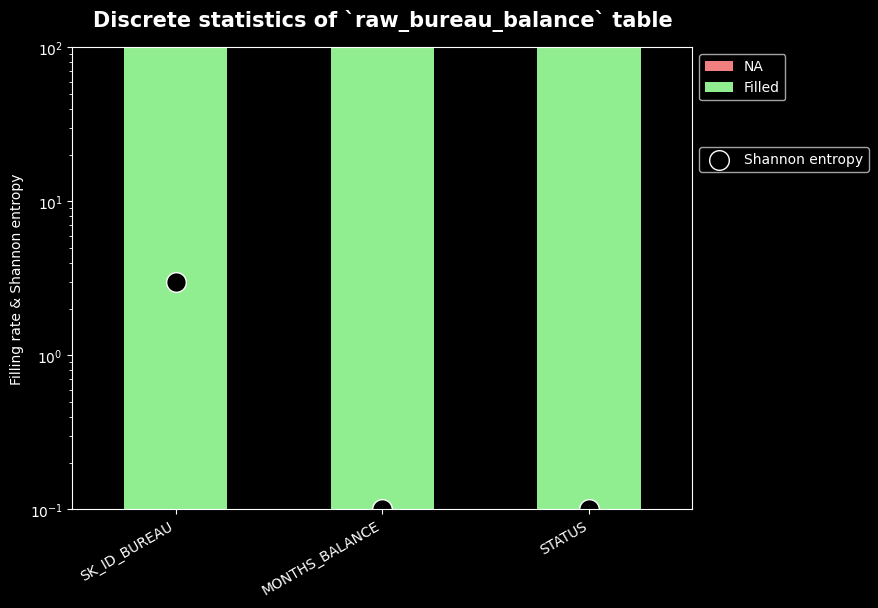

In [13]:
show_discrete_stats(table, f"raw_{table_name}")

## Home Credit Client history

### `credit_card_balance`

Definition:
* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

Définition :
* *Instantanés mensuels des soldes des précédentes cartes de crédit que le demandeur a avec Home Credit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent de cartes de crédit à Home Credit (crédit à la consommation et prêts en espèces) relatifs aux prêts dans notre échantillon - c'est-à-dire que la table a (# prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons une historique observable pour la carte de crédit précédente) de lignes.*

#### Direct load

In [14]:
table_name = "credit_card_balance"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_credit_card_balance,,,,,,
SK_ID_PREV,3840312,104307,0,1.000000,0.027161,int64
SK_ID_CURR,3840312,103558,0,1.000000,0.026966,int64
MONTHS_BALANCE,3840312,96,0,1.000000,0.000025,int64
AMT_BALANCE,3840312,1347904,0,1.000000,0.350988,float64
AMT_CREDIT_LIMIT_ACTUAL,3840312,181,0,1.000000,0.000047,int64
AMT_DRAWINGS_ATM_CURRENT,3090496,2267,749816,0.804751,0.000734,float64
AMT_DRAWINGS_CURRENT,3840312,187005,0,1.000000,0.048695,float64
AMT_DRAWINGS_OTHER_CURRENT,3090496,1832,749816,0.804751,0.000593,float64
AMT_DRAWINGS_POS_CURRENT,3090496,168748,749816,0.804751,0.054602,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_credit_card_balance_2023_04_17_15_15_38_043764.png)


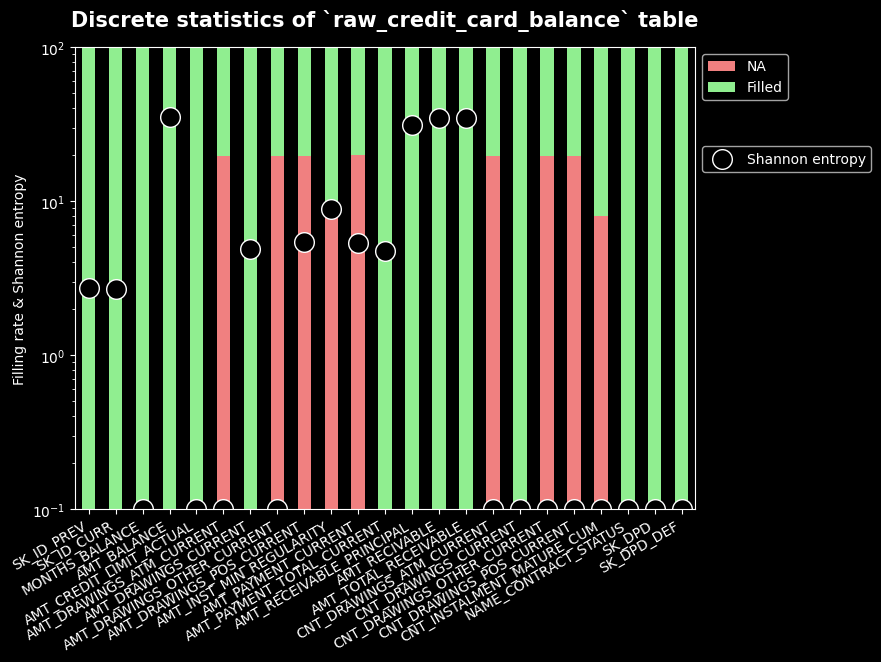

In [15]:
show_discrete_stats(table, f"raw_{table_name}")

### `POS_CASH_balance`

Definition:
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

Définition :
* *Instantanés de solde mensuel des prêts antérieurs en points de vente (POS) et en espèces que le demandeur avait avec Home Credit.*
* *Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts dans notre échantillon - c'est-à-dire que la table a (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) de lignes.*

#### Direct load

In [17]:
table_name = "POS_CASH_balance"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_credit_card_balance,,,,,,
SK_ID_PREV,3840312,104307,0,1.000000,0.027161,int64
SK_ID_CURR,3840312,103558,0,1.000000,0.026966,int64
MONTHS_BALANCE,3840312,96,0,1.000000,0.000025,int64
AMT_BALANCE,3840312,1347904,0,1.000000,0.350988,float64
AMT_CREDIT_LIMIT_ACTUAL,3840312,181,0,1.000000,0.000047,int64
AMT_DRAWINGS_ATM_CURRENT,3090496,2267,749816,0.804751,0.000734,float64
AMT_DRAWINGS_CURRENT,3840312,187005,0,1.000000,0.048695,float64
AMT_DRAWINGS_OTHER_CURRENT,3090496,1832,749816,0.804751,0.000593,float64
AMT_DRAWINGS_POS_CURRENT,3090496,168748,749816,0.804751,0.054602,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_credit_card_balance_2023_04_17_15_15_44_914351.png)


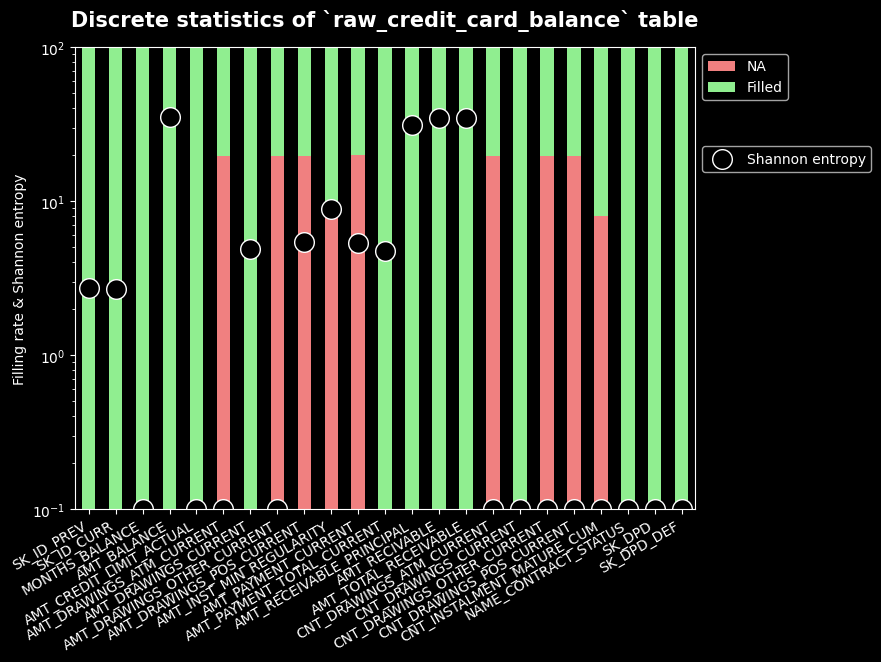

In [16]:
show_discrete_stats(table, f"raw_{table_name}")

### `installments_payments`

Definition:
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

Définition :
* *Historique de remboursement pour les crédits précédemment accordés par Home Credit liés aux prêts dans notre échantillon.*
* *Il y a a) une ligne pour chaque paiement effectué et b) une ligne pour chaque paiement manqué.*
* *Une ligne correspond à un paiement d'une échéance ou à une échéance correspondant à un paiement pour un crédit Home Credit précédent lié aux prêts dans notre échantillon.*

#### Direct load

In [17]:
table_name = "installments_payments"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_installments_payments,,,,,,
SK_ID_PREV,13605401,997752,0,1.000000,0.073335,int64
SK_ID_CURR,13605401,339587,0,1.000000,0.024960,int64
NUM_INSTALMENT_VERSION,13605401,65,0,1.000000,0.000005,float64
NUM_INSTALMENT_NUMBER,13605401,277,0,1.000000,0.000020,int64
DAYS_INSTALMENT,13605401,2922,0,1.000000,0.000215,float64
DAYS_ENTRY_PAYMENT,13602496,3039,2905,0.999786,0.000223,float64
AMT_INSTALMENT,13605401,902539,0,1.000000,0.066337,float64
AMT_PAYMENT,13602496,944235,2905,0.999786,0.069416,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_installments_payments_2023_04_17_15_16_47_727914.png)


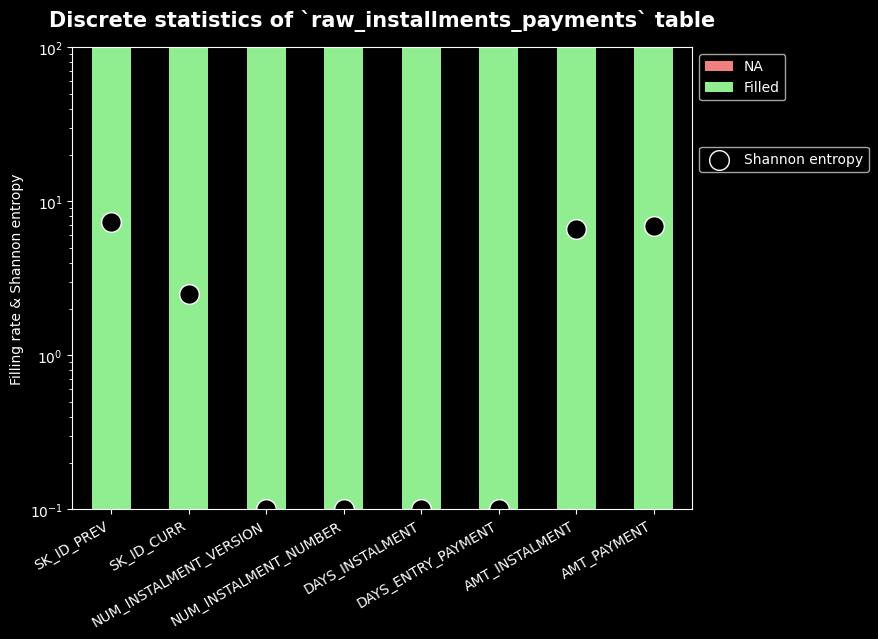

In [18]:
show_discrete_stats(table, f"raw_{table_name}")

### `previous_application`

Definition:
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

Définition :
* *Toutes les précédentes demandes de prêt Home Credit des clients qui ont des prêts dans notre échantillon.*
* *Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.*

#### Direct load

In [19]:
table_name = "previous_application"
table = load_raw_table(table_name)
display(table)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_previous_application,,,,,,
SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
SK_ID_CURR,1670214,338857,0,1.000000,0.202882,int64
NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
AMT_CREDIT,1670213,86803,1,0.999999,0.051971,float64
AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
AMT_GOODS_PRICE,1284699,93885,385515,0.769182,0.073079,float64
WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.000000,0.000004,object


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_previous_application_2023_04_17_15_17_10_629619.png)


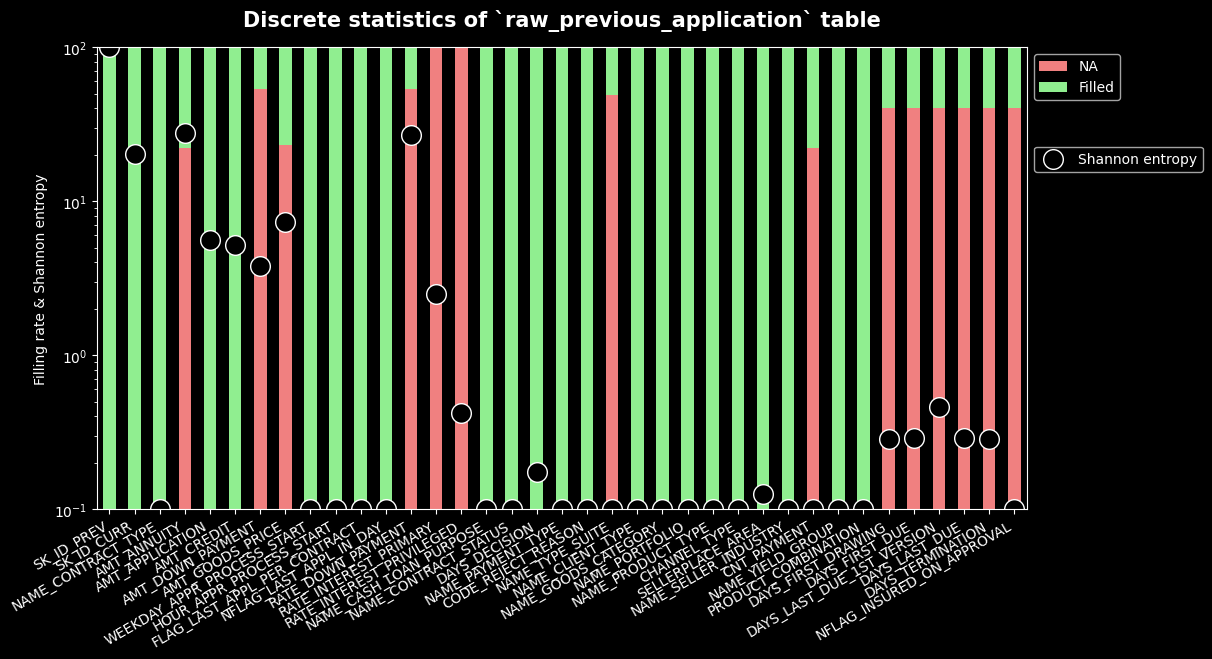

In [20]:
show_discrete_stats(table, f"raw_{table_name}", ratio=1.5)

# Qualité des données : nature (métier) et type (technique)

1. Réassembler l'ensemble des colonnes et filtrer.
2. déterminer les types techniques et les types métiers
3. parser les noms, traduction en français ? 

## Analyse discrète de l'ensemble des variables

Commençons par constituer un dictionnaire des données (346 variables).

Il nous sera utile pour la suite de cette analyse.

In [23]:
from home_credit.load import get_raw_table_names, load_raw_table
table_dict = {
    table_name: load_raw_table(table_name)
    for table_name in get_raw_table_names()
}

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\sample_submission.pqt


In [24]:
from pepper.db_utils import db_discrete_stats
variables = db_discrete_stats(table_dict)
display(variables)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_test,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64
1,application_test,NAME_CONTRACT_TYPE,48744,2,0,1.000000,0.000041,object
2,application_test,CODE_GENDER,48744,2,0,1.000000,0.000041,object
3,application_test,FLAG_OWN_CAR,48744,2,0,1.000000,0.000041,object
4,application_test,FLAG_OWN_REALTY,48744,2,0,1.000000,0.000041,object
...,...,...,...,...,...,...,...,...
34,previous_application,DAYS_LAST_DUE,997149,2873,673065,0.597019,0.002881,float64
35,previous_application,DAYS_TERMINATION,997149,2830,673065,0.597019,0.002838,float64
36,previous_application,NFLAG_INSURED_ON_APPROVAL,997149,2,673065,0.597019,0.000002,float64
0,sample_submission,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64


Croisons avec la table de description pour identifier celles qui ne sont pas documentées et inversement :

In [25]:
from home_credit.load import get_columns_description
col_descs = get_columns_description()
display(col_descs)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


col_descs,Table,Column,Description,Special
col_id,,,,
1,application_{train|test},SK_ID_CURR,ID of loan in our sample,None
2,application_{train|test},TARGET,Target variable (1 - client with payment diffi...,None
5,application_{train|test},NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None
6,application_{train|test},CODE_GENDER,Gender of the client,None
7,application_{train|test},FLAG_OWN_CAR,Flag if the client owns a car,None
...,...,...,...,...
217,installments_payments,NUM_INSTALMENT_NUMBER,On which installment we observe payment,None
218,installments_payments,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,installments_payments,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application


In [26]:
# Get the (table name, col name) couples
comp_vars = variables[variables.columns[:2]].copy()
# Lowercase and remove _train and _test suffixes
comp_vars.table_name = (
    comp_vars.table_name
    .str.lower()
    .str.replace("_(train|test)", "", regex=True)
)
# Remove _train|_test duplicates
comp_vars.drop_duplicates(inplace=True, ignore_index=True)
# One column join
comp_var_keys = comp_vars.apply(tuple, axis=1)
display(comp_var_keys)

0                              (application, SK_ID_CURR)
1                      (application, NAME_CONTRACT_TYPE)
2                             (application, CODE_GENDER)
3                            (application, FLAG_OWN_CAR)
4                         (application, FLAG_OWN_REALTY)
                             ...                        
220                (previous_application, DAYS_LAST_DUE)
221             (previous_application, DAYS_TERMINATION)
222    (previous_application, NFLAG_INSURED_ON_APPROVAL)
223                      (sample_submission, SK_ID_CURR)
224                          (sample_submission, TARGET)
Length: 225, dtype: object

In [27]:
# Get the (table name, col name) couples
comp_descs = col_descs[col_descs.columns[:2]].copy()
# Remove _train and _test suffixes
comp_descs.Table = comp_descs.Table.str.replace("_{train|test}", "", regex=False)
# Remove _train|_test duplicates
comp_descs.drop_duplicates(inplace=True, ignore_index=True)
# One column join
comp_desc_keys = comp_descs.apply(tuple, axis=1)
display(comp_desc_keys)

0                           (application, SK_ID_CURR)
1                               (application, TARGET)
2                   (application, NAME_CONTRACT_TYPE)
3                          (application, CODE_GENDER)
4                         (application, FLAG_OWN_CAR)
                            ...                      
214    (installments_payments, NUM_INSTALMENT_NUMBER)
215          (installments_payments, DAYS_INSTALMENT)
216       (installments_payments, DAYS_ENTRY_PAYMENT)
217           (installments_payments, AMT_INSTALMENT)
218              (installments_payments, AMT_PAYMENT)
Length: 219, dtype: object

Non documentées : les variables de la documentation et celles de l'exemple de soumission, rien d'anormal.

In [28]:
vars_without_desc = comp_var_keys[~comp_var_keys.isin(comp_desc_keys)]
display(vars_without_desc)

165     (homecredit_columns_description, Unnamed: 0)
166          (homecredit_columns_description, Table)
167            (homecredit_columns_description, Row)
168    (homecredit_columns_description, Description)
169        (homecredit_columns_description, Special)
223                  (sample_submission, SK_ID_CURR)
224                      (sample_submission, TARGET)
dtype: object

Documentée mais inexistante : surprise !

In [29]:
descs_without_car = comp_desc_keys[~comp_desc_keys.isin(comp_var_keys)]
display(descs_without_car)

185    (previous_application, NFLAG_MICRO_CASH)
dtype: object

In [30]:
from home_credit.utils import help_cols
help_cols("NFLAG_MICRO_CASH")

Table|Column|Description|Special|
---|---|---|---|
previous_application|NFLAG_MICRO_CASH|Flag Micro finance loan|_|

## Constantes

Les constantes n'apportent aucune information et peuvent être éliminées.

Ici, les seules constantes observées sont dans le jeu de test et l'exemple de soumission.

Ce sont certains des indicateurs de remise de documents. Soient ceux-ci ont été falsifiés et leur valeur fixée, ou bien on constitué une partie de la clé d'extraction de l'ensemble de test.

In [31]:
const_vars = variables[variables.n_u == 1]
display(const_vars)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
95,application_test,FLAG_DOCUMENT_2,48744,1,0,1.0,0.000021,int64
103,application_test,FLAG_DOCUMENT_10,48744,1,0,1.0,0.000021,int64
105,application_test,FLAG_DOCUMENT_12,48744,1,0,1.0,0.000021,int64
106,application_test,FLAG_DOCUMENT_13,48744,1,0,1.0,0.000021,int64
107,application_test,FLAG_DOCUMENT_14,48744,1,0,1.0,0.000021,int64
108,application_test,FLAG_DOCUMENT_15,48744,1,0,1.0,0.000021,int64
109,application_test,FLAG_DOCUMENT_16,48744,1,0,1.0,0.000021,int64
110,application_test,FLAG_DOCUMENT_17,48744,1,0,1.0,0.000021,int64
112,application_test,FLAG_DOCUMENT_19,48744,1,0,1.0,0.000021,int64
113,application_test,FLAG_DOCUMENT_20,48744,1,0,1.0,0.000021,int64


In [32]:
from home_credit.utils import help_cols
help_cols(const_vars.col)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|_|
application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|

Pour la suite, éléminons les variables des tables `application_test`, `sample_submission` et `HomeCredit_columns_description`.

In [33]:
display(variables[variables.table_name.isin([
    "application_test", "sample_submission", "HomeCredit_columns_description"
])])

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_test,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64
1,application_test,NAME_CONTRACT_TYPE,48744,2,0,1.000000,0.000041,object
2,application_test,CODE_GENDER,48744,2,0,1.000000,0.000041,object
3,application_test,FLAG_OWN_CAR,48744,2,0,1.000000,0.000041,object
4,application_test,FLAG_OWN_REALTY,48744,2,0,1.000000,0.000041,object
...,...,...,...,...,...,...,...,...
2,HomeCredit_columns_description,Row,219,196,0,1.000000,0.894977,object
3,HomeCredit_columns_description,Description,219,163,0,1.000000,0.744292,object
4,HomeCredit_columns_description,Special,86,7,133,0.392694,0.081395,object
0,sample_submission,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64


In [34]:
variables_ = variables[~variables.table_name.isin([
    "application_test", "sample_submission", "HomeCredit_columns_description"
])]
display(variables_)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_train,SK_ID_CURR,307511,307511,0,1.000000,1.000000,int64
1,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
3,application_train,CODE_GENDER,307511,3,0,1.000000,0.000010,object
4,application_train,FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
...,...,...,...,...,...,...,...,...
32,previous_application,DAYS_FIRST_DUE,997149,2892,673065,0.597019,0.002900,float64
33,previous_application,DAYS_LAST_DUE_1ST_VERSION,997149,4605,673065,0.597019,0.004618,float64
34,previous_application,DAYS_LAST_DUE,997149,2873,673065,0.597019,0.002881,float64
35,previous_application,DAYS_TERMINATION,997149,2830,673065,0.597019,0.002838,float64


## Variables discrètes dont catégorielles

L'enjeu principal est d'anticiper sur le nombre de colonnes qu'engendrera plus loin le *hot encoding* des catégories.

L'enjeu secondaire est d'avoir un premier aperçu des types de catégories.

### Variables binaires

Ce sont 40 (18 %) des variables et donc 80 catégories.

Leur encodage avec `get_dummies` n'augmentera pas le nombre de colonnes, mais convertira tout type (`int64`, `object`) en `bool`. L'unique cas `float` pour un `FLAG_*` s'explique par la présence de NA. À défaut de les avoir imputés ou éliminés, ils seront traités comme une catégorie à part entière, ce qui entraine la création d'une colonne supplémentaire. 

In [35]:
binary_vars = variables_[variables_.n_u == 2]
print("n_vars:", len(binary_vars))
print("n_mods:", binary_vars.n_u.sum())
display(binary_vars)

n_vars: 40
n_mods: 80


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
1,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
4,application_train,FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
5,application_train,FLAG_OWN_REALTY,307511,2,0,1.000000,0.000007,object
22,application_train,FLAG_MOBIL,307511,2,0,1.000000,0.000007,int64
23,application_train,FLAG_EMP_PHONE,307511,2,0,1.000000,0.000007,int64
24,application_train,FLAG_WORK_PHONE,307511,2,0,1.000000,0.000007,int64
25,application_train,FLAG_CONT_MOBILE,307511,2,0,1.000000,0.000007,int64
26,application_train,FLAG_PHONE,307511,2,0,1.000000,0.000007,int64
27,application_train,FLAG_EMAIL,307511,2,0,1.000000,0.000007,int64


In [36]:
help_cols(binary_vars.col)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|_|
application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
application_{train\|test}|FLAG_OWN_CAR|Flag if the client owns a car|_|
application_{train\|test}|FLAG_OWN_REALTY|Flag if client owns a house or flat|_|
application_{train\|test}|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|_|
application_{train\|test}|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|_|
application_{train\|test}|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|_|
application_{train\|test}|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|_|
application_{train\|test}|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|_|
application_{train\|test}|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|_|
application_{train\|test}|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|_|
application_{train\|test}|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
application_{train\|test}|FLAG_DOCUMENT_3|Did client provide document 3|_|
application_{train\|test}|FLAG_DOCUMENT_4|Did client provide document 4|_|
application_{train\|test}|FLAG_DOCUMENT_5|Did client provide document 5|_|
application_{train\|test}|FLAG_DOCUMENT_6|Did client provide document 6|_|
application_{train\|test}|FLAG_DOCUMENT_7|Did client provide document 7|_|
application_{train\|test}|FLAG_DOCUMENT_8|Did client provide document 8|_|
application_{train\|test}|FLAG_DOCUMENT_9|Did client provide document 9|_|
application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
application_{train\|test}|FLAG_DOCUMENT_11|Did client provide document 11|_|
application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
application_{train\|test}|FLAG_DOCUMENT_18|Did client provide document 18|_|
application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|
previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
previous_application|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|_|
previous_application|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|_|
previous_application|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|_|

### Variables ayant de 3 à 10 modalités

Ce sont 34 variables pour 206 catégories.

In [37]:
mod_3_10_vars = variables_[(2 < variables_.n_u) & (variables_.n_u < 11)]
print("n_vars:", len(mod_3_10_vars))
print("n_mods:", mod_3_10_vars.n_u.sum())
display(mod_3_10_vars)

n_vars: 34
n_mods: 206


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
3,application_train,CODE_GENDER,307511,3,0,1.000000,9.755749e-06,object
11,application_train,NAME_TYPE_SUITE,306219,7,1292,0.995799,2.285946e-05,object
12,application_train,NAME_INCOME_TYPE,307511,8,0,1.000000,2.601533e-05,object
13,application_train,NAME_EDUCATION_TYPE,307511,5,0,1.000000,1.625958e-05,object
14,application_train,NAME_FAMILY_STATUS,307511,6,0,1.000000,1.951150e-05,object
15,application_train,NAME_HOUSING_TYPE,307511,6,0,1.000000,1.951150e-05,object
30,application_train,REGION_RATING_CLIENT,307511,3,0,1.000000,9.755749e-06,int64
31,application_train,REGION_RATING_CLIENT_W_CITY,307511,3,0,1.000000,9.755749e-06,int64
32,application_train,WEEKDAY_APPR_PROCESS_START,307511,7,0,1.000000,2.276341e-05,object
86,application_train,FONDKAPREMONT_MODE,97216,4,210295,0.316138,4.114549e-05,object


In [38]:
help_cols(mod_3_10_vars.col)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
application_{train\|test}|CODE_GENDER|Gender of the client|_|
application_{train\|test}|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|_|
application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
application_{train\|test}|NAME_FAMILY_STATUS|Family status of the client|_|
application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
application_{train\|test}|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|_|
application_{train\|test}|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|_|
application_{train\|test}|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|_|
application_{train\|test}|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |_|
application_{train\|test}|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|
bureau|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|_|
bureau|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
bureau|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|_|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
previous_application|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|_|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
previous_application|CODE_REJECT_REASON|Why was the previous application rejected|_|
previous_application|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|_|
previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
previous_application|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, �|_|
previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|
previous_application|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|

### Variables ayant de 11 à 30 modalités

Ce sont 19 variables pour 396 catégories.

In [39]:
mod_11_30_vars = variables_[(10 < variables_.n_u) & (variables_.n_u < 31)]
print("n_vars:", len(mod_11_30_vars))
print("n_mods:", mod_11_30_vars.n_u.sum())
display(mod_11_30_vars)

n_vars: 19
n_mods: 396


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
6,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64
28,application_train,OCCUPATION_TYPE,211120,18,96391,0.686545,0.000085,object
29,application_train,CNT_FAM_MEMBERS,307509,17,2,0.999993,0.000055,float64
33,application_train,HOUR_APPR_PROCESS_START,307511,24,0,1.000000,0.000078,int64
63,application_train,ELEVATORS_MODE,143620,26,163891,0.467040,0.000181,float64
64,application_train,ENTRANCES_MODE,152683,30,154828,0.496512,0.000196,float64
65,application_train,FLOORSMAX_MODE,154491,25,153020,0.502392,0.000162,float64
66,application_train,FLOORSMIN_MODE,98869,25,208642,0.321514,0.000253,float64
119,application_train,AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64
120,application_train,AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.864984,0.000041,float64


In [40]:
help_cols(mod_11_30_vars.col)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|CNT_CHILDREN|Number of children the client has|_|
application_{train\|test}|OCCUPATION_TYPE|What kind of occupation does the client have|_|
application_{train\|test}|CNT_FAM_MEMBERS|How many family members does client have|_|
application_{train\|test}|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
application_{train\|test}|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|
bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|
credit_card_balance|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|_|
previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|
previous_application|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|
previous_application|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|_|
previous_application|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|_|
previous_application|NAME_SELLER_INDUSTRY|The industry of the seller|_|
previous_application|PRODUCT_COMBINATION|Detailed product combination of the previous application|_|

### Variables ayant de 31 à 100 modalités

Ce sont 17 variables pour 1054 modalités.

In [41]:
mod_31_100_vars = variables_[(30 < variables_.n_u) & (variables_.n_u < 101)]
print("n_vars:", len(mod_31_100_vars))
print("n_mods:", mod_31_100_vars.n_u.sum())
display(mod_31_100_vars)

n_vars: 17
n_mods: 1054


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
16,application_train,REGION_POPULATION_RELATIVE,307511,81,0,1.000000,0.000263,float64
21,application_train,OWN_CAR_AGE,104582,62,202929,0.340092,0.000593,float64
40,application_train,ORGANIZATION_TYPE,307511,58,0,1.000000,0.000189,object
77,application_train,ELEVATORS_MEDI,143620,46,163891,0.467040,0.000320,float64
78,application_train,ENTRANCES_MEDI,152683,46,154828,0.496512,0.000301,float64
79,application_train,FLOORSMAX_MEDI,154491,49,153020,0.502392,0.000317,float64
80,application_train,FLOORSMIN_MEDI,98869,47,208642,0.321514,0.000475,float64
91,application_train,OBS_30_CNT_SOCIAL_CIRCLE,306490,33,1021,0.996680,0.000108,float64
93,application_train,OBS_60_CNT_SOCIAL_CIRCLE,306490,33,1021,0.996680,0.000108,float64
1,bureau_balance,MONTHS_BALANCE,27299925,97,0,1.000000,0.000004,int64


In [42]:
help_cols(mod_31_100_vars.col)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |
application_{train\|test}|OWN_CAR_AGE|Age of client's car|_|
application_{train\|test}|ORGANIZATION_TYPE|Type of organization where client works|_|
application_{train\|test}|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|_|
application_{train\|test}|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|_|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
credit_card_balance|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|_|
previous_application|CNT_PAYMENT|Term of previous credit at application of the previous application|_|
installments_payments|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|_|

## Variables numériques flottantes

## Clés primaires

#### Les clés primaires a priori (`SK_*`)

In [43]:
sk_cols = variables_[variables_.col.str.startswith("SK_")]
sk_cols = sk_cols.sort_values(by=['col', 'Shannon entropy'], ascending=False)
display(sk_cols)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.0,1.000000,int64
0,POS_CASH_balance,SK_ID_PREV,10001358,936325,0,1.0,0.093620,int64
0,installments_payments,SK_ID_PREV,13605401,997752,0,1.0,0.073335,int64
0,credit_card_balance,SK_ID_PREV,3840312,104307,0,1.0,0.027161,int64
0,application_train,SK_ID_CURR,307511,307511,0,1.0,1.000000,int64
1,previous_application,SK_ID_CURR,1670214,338857,0,1.0,0.202882,int64
0,bureau,SK_ID_CURR,1716428,305811,0,1.0,0.178167,int64
1,POS_CASH_balance,SK_ID_CURR,10001358,337252,0,1.0,0.033721,int64
1,credit_card_balance,SK_ID_CURR,3840312,103558,0,1.0,0.026966,int64
1,installments_payments,SK_ID_CURR,13605401,339587,0,1.0,0.024960,int64


In [44]:
sk_names = sk_cols.col.unique()
print("Keys:", sk_names)

Keys: ['SK_ID_PREV' 'SK_ID_CURR' 'SK_ID_BUREAU' 'SK_DPD_DEF' 'SK_DPD']


In [45]:
descs = table_dict["HomeCredit_columns_description"]
display(descs)
sk_descs = descs[descs.Row.isin(sk_names)]
display(sk_descs)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,None
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,None
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,None
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,None
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,None
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,None


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,None
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,None
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,None
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,None
151,154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
171,174,credit_card_balance.csv,SK_DPD,DPD (Days past due) during the month on the pr...,None
172,175,credit_card_balance.csv,SK_DPD_DEF,DPD (Days past due) during the month with tole...,None
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed


#### Les clés primaires a posteriori

In [46]:
pk_cols = variables_[variables_['Shannon entropy'] == 1.0]
display(pk_cols)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_train,SK_ID_CURR,307511,307511,0,1.0,1.0,int64
1,bureau,SK_ID_BUREAU,1716428,1716428,0,1.0,1.0,int64
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.0,1.0,int64


## Montants a priori (`AMT_*`)

In [47]:
amt_cols = variables_[variables_.col.str.startswith("AMT_")]
print("n_amt_cols:", amt_cols.shape[0])
display(amt_cols)

n_amt_cols: 35


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
7,application_train,AMT_INCOME_TOTAL,307511,2548,0,1.000000,0.008286,float64
8,application_train,AMT_CREDIT,307511,5603,0,1.000000,0.018220,float64
9,application_train,AMT_ANNUITY,307499,13672,12,0.999961,0.044462,float64
10,application_train,AMT_GOODS_PRICE,307233,1002,278,0.999096,0.003261,float64
116,application_train,AMT_REQ_CREDIT_BUREAU_HOUR,265992,5,41519,0.864984,0.000019,float64
117,application_train,AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
118,application_train,AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
119,application_train,AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64
120,application_train,AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.864984,0.000041,float64
121,application_train,AMT_REQ_CREDIT_BUREAU_YEAR,265992,25,41519,0.864984,0.000094,float64


In [48]:
amt_names = amt_cols.col.unique()
print("AMT_cols:", amt_names)

AMT_cols: ['AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY' 'AMT_GOODS_PRICE'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'AMT_CREDIT_MAX_OVERDUE' 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT'
 'AMT_CREDIT_SUM_LIMIT' 'AMT_CREDIT_SUM_OVERDUE' 'AMT_BALANCE'
 'AMT_CREDIT_LIMIT_ACTUAL' 'AMT_DRAWINGS_ATM_CURRENT'
 'AMT_DRAWINGS_CURRENT' 'AMT_DRAWINGS_OTHER_CURRENT'
 'AMT_DRAWINGS_POS_CURRENT' 'AMT_INST_MIN_REGULARITY'
 'AMT_PAYMENT_CURRENT' 'AMT_PAYMENT_TOTAL_CURRENT'
 'AMT_RECEIVABLE_PRINCIPAL' 'AMT_RECIVABLE' 'AMT_TOTAL_RECEIVABLE'
 'AMT_INSTALMENT' 'AMT_PAYMENT' 'AMT_APPLICATION' 'AMT_DOWN_PAYMENT']


In [49]:
help_cols(amt_names)

Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_INCOME_TOTAL|Income of the client|_|
application_{train\|test}|AMT_CREDIT|Credit amount of the loan|_|
application_{train\|test}|AMT_ANNUITY|Loan annuity|_|
application_{train\|test}|AMT_GOODS_PRICE|For consumer loans it is the price of the goods for which the loan is given|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|
bureau|AMT_CREDIT_MAX_OVERDUE|Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)|_|
bureau|AMT_CREDIT_SUM|Current credit amount for the Credit Bureau credit|_|
bureau|AMT_CREDIT_SUM_DEBT|Current debt on Credit Bureau credit|_|
bureau|AMT_CREDIT_SUM_LIMIT|Current credit limit of credit card reported in Credit Bureau|_|
bureau|AMT_CREDIT_SUM_OVERDUE|Current amount overdue on Credit Bureau credit|_|
bureau|AMT_ANNUITY|Annuity of the Credit Bureau credit|_|
credit_card_balance|AMT_BALANCE|Balance during the month of previous credit|_|
credit_card_balance|AMT_CREDIT_LIMIT_ACTUAL|Credit card limit during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_ATM_CURRENT|Amount drawing at ATM during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_CURRENT|Amount drawing during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_OTHER_CURRENT|Amount of other drawings during the month of the previous credit|_|
credit_card_balance|AMT_DRAWINGS_POS_CURRENT|Amount drawing or buying goods during the month of the previous credit|_|
credit_card_balance|AMT_INST_MIN_REGULARITY|Minimal installment for this month of the previous credit|_|
credit_card_balance|AMT_PAYMENT_CURRENT|How much did the client pay during the month on the previous credit|_|
credit_card_balance|AMT_PAYMENT_TOTAL_CURRENT|How much did the client pay during the month in total on the previous credit|_|
credit_card_balance|AMT_RECEIVABLE_PRINCIPAL|Amount receivable for principal on the previous credit|_|
credit_card_balance|AMT_RECIVABLE|Amount receivable on the previous credit|_|
credit_card_balance|AMT_TOTAL_RECEIVABLE|Total amount receivable on the previous credit|_|
previous_application|AMT_ANNUITY|Annuity of previous application|_|
previous_application|AMT_APPLICATION|For how much credit did client ask on the previous application|_|
previous_application|AMT_CREDIT|Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT|_|
previous_application|AMT_DOWN_PAYMENT|Down payment on the previous application|_|
previous_application|AMT_GOODS_PRICE|Goods price of good that client asked for (if applicable) on the previous application|_|
installments_payments|AMT_INSTALMENT|What was the prescribed installment amount of previous credit on this installment|_|
installments_payments|AMT_PAYMENT|What the client actually paid on previous credit on this installment|_|

## `RATE_*`

In [50]:
rate_cols = variables_[variables_.col.str.startswith("RATE_")]
print("n_rate_cols:", rate_cols.shape[0])
display(rate_cols)

n_rate_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
12,previous_application,RATE_DOWN_PAYMENT,774370,207033,895844,0.463635,0.267357,float64
13,previous_application,RATE_INTEREST_PRIMARY,5951,148,1664263,0.003563,0.024870,float64
14,previous_application,RATE_INTEREST_PRIVILEGED,5951,25,1664263,0.003563,0.004201,float64


In [51]:
rate_names = rate_cols.col.unique()
print("RATE_cols:", rate_names)
help_cols(rate_names)

RATE_cols: ['RATE_DOWN_PAYMENT' 'RATE_INTEREST_PRIMARY' 'RATE_INTEREST_PRIVILEGED']


Table|Column|Description|Special|
---|---|---|---|
previous_application|RATE_DOWN_PAYMENT|Down payment rate normalized on previous credit|normalized|
previous_application|RATE_INTEREST_PRIMARY|Interest rate normalized on previous credit|normalized|
previous_application|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|

## `CNT_*`

In [52]:
cnt_cols = variables_[variables_.col.str.startswith("CNT_")]
print("n_cnt_cols:", cnt_cols.shape[0])
display(cnt_cols)

n_cnt_cols: 11


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
6,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64
29,application_train,CNT_FAM_MEMBERS,307509,17,2,0.999993,0.000055,float64
9,bureau,CNT_CREDIT_PROLONG,1716428,10,0,1.000000,0.000006,int64
15,credit_card_balance,CNT_DRAWINGS_ATM_CURRENT,3090496,44,749816,0.804751,0.000014,float64
16,credit_card_balance,CNT_DRAWINGS_CURRENT,3840312,129,0,1.000000,0.000034,int64
17,credit_card_balance,CNT_DRAWINGS_OTHER_CURRENT,3090496,11,749816,0.804751,0.000004,float64
18,credit_card_balance,CNT_DRAWINGS_POS_CURRENT,3090496,133,749816,0.804751,0.000043,float64
19,credit_card_balance,CNT_INSTALMENT_MATURE_CUM,3535076,121,305236,0.920518,0.000034,float64
3,POS_CASH_balance,CNT_INSTALMENT,9975287,73,26071,0.997393,0.000007,float64
4,POS_CASH_balance,CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997392,0.000008,float64


In [53]:
cnt_names = cnt_cols.col.unique()
print("CNT_cols:", cnt_names)
help_cols(cnt_names)

CNT_cols: ['CNT_CHILDREN' 'CNT_FAM_MEMBERS' 'CNT_CREDIT_PROLONG'
 'CNT_DRAWINGS_ATM_CURRENT' 'CNT_DRAWINGS_CURRENT'
 'CNT_DRAWINGS_OTHER_CURRENT' 'CNT_DRAWINGS_POS_CURRENT'
 'CNT_INSTALMENT_MATURE_CUM' 'CNT_INSTALMENT' 'CNT_INSTALMENT_FUTURE'
 'CNT_PAYMENT']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|CNT_CHILDREN|Number of children the client has|_|
application_{train\|test}|CNT_FAM_MEMBERS|How many family members does client have|_|
bureau|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|_|
pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_CURRENT|Number of drawings during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|_|
credit_card_balance|CNT_DRAWINGS_POS_CURRENT|Number of drawings for goods during this month on the previous credit|_|
credit_card_balance|CNT_INSTALMENT_MATURE_CUM|Number of paid installments on the previous credit|_|
previous_application|CNT_PAYMENT|Term of previous credit at application of the previous application|_|

## `NUM_*`

In [54]:
num_cols = variables_[variables_.col.str.startswith("NUM_")]
print("n_num_cols:", num_cols.shape[0])
display(num_cols)

n_num_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,installments_payments,NUM_INSTALMENT_VERSION,13605401,65,0,1.0,0.000005,float64
3,installments_payments,NUM_INSTALMENT_NUMBER,13605401,277,0,1.0,0.000020,int64


In [55]:
num_names = num_cols.col.unique()
print("NUM_cols:", num_names)
help_cols(num_names)

NUM_cols: ['NUM_INSTALMENT_VERSION' 'NUM_INSTALMENT_NUMBER']


Table|Column|Description|Special|
---|---|---|---|
installments_payments|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|_|
installments_payments|NUM_INSTALMENT_NUMBER|On which installment we observe payment|_|

## `NAME_*`

In [56]:
name_cols = variables_[variables_.col.str.startswith("NAME_")]
print("n_name_cols:", name_cols.shape[0])
display(name_cols)

n_name_cols: 19


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,6.503832e-06,object
11,application_train,NAME_TYPE_SUITE,306219,7,1292,0.995799,2.285946e-05,object
12,application_train,NAME_INCOME_TYPE,307511,8,0,1.000000,2.601533e-05,object
13,application_train,NAME_EDUCATION_TYPE,307511,5,0,1.000000,1.625958e-05,object
14,application_train,NAME_FAMILY_STATUS,307511,6,0,1.000000,1.951150e-05,object
15,application_train,NAME_HOUSING_TYPE,307511,6,0,1.000000,1.951150e-05,object
20,credit_card_balance,NAME_CONTRACT_STATUS,3840312,7,0,1.000000,1.822769e-06,object
5,POS_CASH_balance,NAME_CONTRACT_STATUS,10001358,9,0,1.000000,8.998778e-07,object
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
15,previous_application,NAME_CASH_LOAN_PURPOSE,1670214,25,0,1.000000,1.496814e-05,object


In [57]:
name_names = name_cols.col.unique()
print("NAME_cols:", name_names)
help_cols(name_names)

NAME_cols: ['NAME_CONTRACT_TYPE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'NAME_CONTRACT_STATUS' 'NAME_CASH_LOAN_PURPOSE' 'NAME_PAYMENT_TYPE'
 'NAME_CLIENT_TYPE' 'NAME_GOODS_CATEGORY' 'NAME_PORTFOLIO'
 'NAME_PRODUCT_TYPE' 'NAME_SELLER_INDUSTRY' 'NAME_YIELD_GROUP']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
application_{train\|test}|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|_|
application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
application_{train\|test}|NAME_FAMILY_STATUS|Family status of the client|_|
application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
previous_application|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|_|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
previous_application|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|_|
previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
previous_application|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|_|
previous_application|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, �|_|
previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
previous_application|NAME_SELLER_INDUSTRY|The industry of the seller|_|
previous_application|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|

## `CODE_*`

In [58]:
code_cols = variables_[variables_.col.str.startswith("CODE_")]
print("n_code_cols:", code_cols.shape[0])
display(code_cols)

n_code_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
3,application_train,CODE_GENDER,307511,3,0,1.0,0.000010,object
19,previous_application,CODE_REJECT_REASON,1670214,9,0,1.0,0.000005,object


In [59]:
code_names = code_cols.col.unique()
print("CODE_cols:", code_names)
help_cols(code_names)

CODE_cols: ['CODE_GENDER' 'CODE_REJECT_REASON']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|CODE_GENDER|Gender of the client|_|
previous_application|CODE_REJECT_REASON|Why was the previous application rejected|_|

## `FLAG_*`

Catégories binaires.

Pour certaines, il n'y qu'une valeur, ce sont donc des colonnes constantes qui peuvent être éliminées.

Taux de remplissage de 100 % pour chacune d'entre elles.

In [60]:
flag_cols = variables_[variables_.col.str.startswith("FLAG_")]
print("n_flag_cols:", flag_cols.shape[0])
display(flag_cols)

n_flag_cols: 29


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
4,application_train,FLAG_OWN_CAR,307511,2,0,1.0,0.000007,object
5,application_train,FLAG_OWN_REALTY,307511,2,0,1.0,0.000007,object
22,application_train,FLAG_MOBIL,307511,2,0,1.0,0.000007,int64
23,application_train,FLAG_EMP_PHONE,307511,2,0,1.0,0.000007,int64
24,application_train,FLAG_WORK_PHONE,307511,2,0,1.0,0.000007,int64
25,application_train,FLAG_CONT_MOBILE,307511,2,0,1.0,0.000007,int64
26,application_train,FLAG_PHONE,307511,2,0,1.0,0.000007,int64
27,application_train,FLAG_EMAIL,307511,2,0,1.0,0.000007,int64
96,application_train,FLAG_DOCUMENT_2,307511,2,0,1.0,0.000007,int64
97,application_train,FLAG_DOCUMENT_3,307511,2,0,1.0,0.000007,int64


In [61]:
flag_names = flag_cols.col.unique()
print("FLAG_cols:", flag_names)
help_cols(flag_names)

FLAG_cols: ['FLAG_OWN_CAR' 'FLAG_OWN_REALTY' 'FLAG_MOBIL' 'FLAG_EMP_PHONE'
 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE' 'FLAG_EMAIL'
 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5'
 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11' 'FLAG_DOCUMENT_12'
 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14' 'FLAG_DOCUMENT_15'
 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17' 'FLAG_DOCUMENT_18'
 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20' 'FLAG_DOCUMENT_21'
 'FLAG_LAST_APPL_PER_CONTRACT']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|FLAG_OWN_CAR|Flag if the client owns a car|_|
application_{train\|test}|FLAG_OWN_REALTY|Flag if client owns a house or flat|_|
application_{train\|test}|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|_|
application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
application_{train\|test}|FLAG_DOCUMENT_3|Did client provide document 3|_|
application_{train\|test}|FLAG_DOCUMENT_4|Did client provide document 4|_|
application_{train\|test}|FLAG_DOCUMENT_5|Did client provide document 5|_|
application_{train\|test}|FLAG_DOCUMENT_6|Did client provide document 6|_|
application_{train\|test}|FLAG_DOCUMENT_7|Did client provide document 7|_|
application_{train\|test}|FLAG_DOCUMENT_8|Did client provide document 8|_|
application_{train\|test}|FLAG_DOCUMENT_9|Did client provide document 9|_|
application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
application_{train\|test}|FLAG_DOCUMENT_11|Did client provide document 11|_|
application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
application_{train\|test}|FLAG_DOCUMENT_18|Did client provide document 18|_|
application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|
previous_application|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|_|

## `NFLAG_*`

Catégories binaires.

Taux de remplissage de 100 % pour chacune d'entre elles.

Une `float`sans raison.

In [62]:
nflag_cols = variables_[variables_.col.str.startswith("NFLAG_")]
print("n_nflag_cols:", nflag_cols.shape[0])
display(nflag_cols)

n_nflag_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
11,previous_application,NFLAG_LAST_APPL_IN_DAY,1670214,2,0,1.000000,0.000001,int64
36,previous_application,NFLAG_INSURED_ON_APPROVAL,997149,2,673065,0.597019,0.000002,float64


In [63]:
nflag_names = nflag_cols.col.unique()
print("NFLAG_cols:", nflag_names)
help_cols(nflag_names)

NFLAG_cols: ['NFLAG_LAST_APPL_IN_DAY' 'NFLAG_INSURED_ON_APPROVAL']


Table|Column|Description|Special|
---|---|---|---|
previous_application|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|_|
previous_application|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|_|

In [64]:
from home_credit.load import load_raw_table
table_name = "previous_application"
table = load_raw_table(table_name)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


In [65]:
display(table.NFLAG_LAST_APPL_IN_DAY.value_counts())
display(table.NFLAG_INSURED_ON_APPROVAL.value_counts())

NFLAG_LAST_APPL_IN_DAY
1    1664314
0       5900
Name: count, dtype: int64

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

## `MONTHS_*`

In [66]:
months_cols = variables_[variables_.col.str.startswith("MONTHS_")]
print("n_months_cols:", months_cols.shape[0])
display(months_cols)

n_months_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
1,bureau_balance,MONTHS_BALANCE,27299925,97,0,1.0,0.000004,int64
2,credit_card_balance,MONTHS_BALANCE,3840312,96,0,1.0,0.000025,int64
2,POS_CASH_balance,MONTHS_BALANCE,10001358,96,0,1.0,0.000010,int64


In [67]:
months_names = months_cols.col.unique()
print("DAYS_cols:", months_names)
help_cols(months_names)

DAYS_cols: ['MONTHS_BALANCE']


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|

## `DAYS_*`

In [68]:
days_cols = variables_[variables_.col.str.startswith("DAYS_")]
print("n_days_cols:", days_cols.shape[0])
display(days_cols)

n_days_cols: 17


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
17,application_train,DAYS_BIRTH,307511,17460,0,1.000000,0.056778,int64
18,application_train,DAYS_EMPLOYED,307511,12574,0,1.000000,0.040890,int64
19,application_train,DAYS_REGISTRATION,307511,15688,0,1.000000,0.051016,float64
20,application_train,DAYS_ID_PUBLISH,307511,6168,0,1.000000,0.020058,int64
95,application_train,DAYS_LAST_PHONE_CHANGE,307510,3773,1,0.999997,0.012270,float64
4,bureau,DAYS_CREDIT,1716428,2923,0,1.000000,0.001703,int64
6,bureau,DAYS_CREDIT_ENDDATE,1610875,14096,105553,0.938504,0.008751,float64
7,bureau,DAYS_ENDDATE_FACT,1082775,2917,633653,0.630830,0.002694,float64
15,bureau,DAYS_CREDIT_UPDATE,1716428,2982,0,1.000000,0.001737,int64
4,installments_payments,DAYS_INSTALMENT,13605401,2922,0,1.000000,0.000215,float64


In [69]:
days_names = days_cols.col.unique()
print("DAYS_cols:", days_names)
help_cols(days_names)

DAYS_cols: ['DAYS_BIRTH' 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH'
 'DAYS_LAST_PHONE_CHANGE' 'DAYS_CREDIT' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'DAYS_CREDIT_UPDATE' 'DAYS_INSTALMENT'
 'DAYS_ENTRY_PAYMENT' 'DAYS_DECISION' 'DAYS_FIRST_DRAWING'
 'DAYS_FIRST_DUE' 'DAYS_LAST_DUE_1ST_VERSION' 'DAYS_LAST_DUE'
 'DAYS_TERMINATION']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|DAYS_BIRTH|Client's age in days at the time of application|time only relative to the application|
application_{train\|test}|DAYS_EMPLOYED|How many days before the application the person started current employment|time only relative to the application|
application_{train\|test}|DAYS_REGISTRATION|How many days before the application did client change his registration|time only relative to the application|
application_{train\|test}|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan|time only relative to the application|
application_{train\|test}|DAYS_LAST_PHONE_CHANGE|How many days before application did client change phone|_|
bureau|DAYS_CREDIT|How many days before current application did client apply for Credit Bureau credit|time only relative to the application|
bureau|DAYS_CREDIT_ENDDATE|Remaining duration of CB credit (in days) at the time of application in Home Credit|time only relative to the application|
bureau|DAYS_ENDDATE_FACT|Days since CB credit ended at the time of application in Home Credit (only for closed credit)|time only relative to the application|
bureau|DAYS_CREDIT_UPDATE|How many days before loan application did last information about the Credit Bureau credit come|time only relative to the application|
previous_application|DAYS_DECISION|Relative to current application when was the decision about previous application made|time only relative to the application|
previous_application|DAYS_FIRST_DRAWING|Relative to application date of current application when was the first disbursement of the previous application|time only relative to the application|
previous_application|DAYS_FIRST_DUE|Relative to application date of current application when was the first due supposed to be of the previous application|time only relative to the application|
previous_application|DAYS_LAST_DUE_1ST_VERSION|Relative to application date of current application when was the first due of the previous application|time only relative to the application|
previous_application|DAYS_LAST_DUE|Relative to application date of current application when was the last due date of the previous application|time only relative to the application|
previous_application|DAYS_TERMINATION|Relative to application date of current application when was the expected termination of the previous application|time only relative to the application|
installments_payments|DAYS_INSTALMENT|When the installment of previous credit was supposed to be paid (relative to application date of current loan)|time only relative to the application|
installments_payments|DAYS_ENTRY_PAYMENT|When was the installments of previous credit paid actually (relative to application date of current loan)|time only relative to the application|

## `HOUR_*`

In [70]:
hour_cols = variables_[variables_.col.str.startswith("HOUR_")]
print("n_hour_cols:", hour_cols.shape[0])
display(hour_cols)

n_hour_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
33,application_train,HOUR_APPR_PROCESS_START,307511,24,0,1.0,0.000078,int64
9,previous_application,HOUR_APPR_PROCESS_START,1670214,24,0,1.0,0.000014,int64


In [71]:
hour_names = hour_cols.col.unique()
print("HOUR_cols:", hour_names)
help_cols(hour_names)

HOUR_cols: ['HOUR_APPR_PROCESS_START']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|

## `WEEKDAY_*`

In [72]:
weekday_cols = variables_[variables_.col.str.startswith("WEEKDAY_")]
print("n_weekday_cols:", weekday_cols.shape[0])
display(weekday_cols)

n_weekday_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
32,application_train,WEEKDAY_APPR_PROCESS_START,307511,7,0,1.0,0.000023,object
8,previous_application,WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.0,0.000004,object


In [73]:
weekeday_names = weekday_cols.col.unique()
print("WEEKDAY_cols:", weekeday_names)
help_cols(weekeday_names)

WEEKDAY_cols: ['WEEKDAY_APPR_PROCESS_START']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|_|
previous_application|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|_|

## `CHANNEL_*`

Catégorie x 8.

In [74]:
channel_cols = variables_[variables_.col.str.startswith("CHANNEL_")]
print("n_channel_cols:", channel_cols.shape[0])
display(channel_cols)

n_channel_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
25,previous_application,CHANNEL_TYPE,1670214,8,0,1.0,0.000005,object


In [75]:
channel_names = channel_cols.col.unique()
print("CHANNEL_cols:", channel_names)
help_cols(channel_names)

CHANNEL_cols: ['CHANNEL_TYPE']


Table|Column|Description|Special|
---|---|---|---|
previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|

In [76]:
from home_credit.load import load_raw_table
table_name = "previous_application"
table = load_raw_table(table_name)
display(table.CHANNEL_TYPE.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


CHANNEL_TYPE
Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: count, dtype: int64

## `CREDIT_*`

L'une des variables est à renommer en `DAYS_`.

In [77]:
credit_cols = variables_[variables_.col.str.startswith("CREDIT_")]
print("n_credit_cols:", credit_cols.shape[0])
display(credit_cols)

n_credit_cols: 4


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,bureau,CREDIT_ACTIVE,1716428,4,0,1.0,0.000002,object
3,bureau,CREDIT_CURRENCY,1716428,4,0,1.0,0.000002,object
5,bureau,CREDIT_DAY_OVERDUE,1716428,942,0,1.0,0.000549,int64
14,bureau,CREDIT_TYPE,1716428,15,0,1.0,0.000009,object


In [78]:
credit_names = credit_cols.col.unique()
print("CREDIT_cols:", credit_names)
help_cols(credit_names)

CREDIT_cols: ['CREDIT_ACTIVE' 'CREDIT_CURRENCY' 'CREDIT_DAY_OVERDUE' 'CREDIT_TYPE']


Table|Column|Description|Special|
---|---|---|---|
bureau|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|_|
bureau|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
bureau|CREDIT_DAY_OVERDUE|Number of days past due on CB credit at the time of application for related loan in our sample|_|
bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|

In [79]:
from home_credit.load import load_raw_table
table_name = "bureau"
table = load_raw_table(table_name)
display(table.CREDIT_ACTIVE.value_counts())
display(table.CREDIT_CURRENCY.value_counts())
display(table.CREDIT_TYPE.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt


CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

## `REGION_*`

In [80]:
region_cols = variables_[variables_.col.str.startswith("REGION_")]
print("n_region_cols:", region_cols.shape[0])
display(region_cols)

n_region_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
16,application_train,REGION_POPULATION_RELATIVE,307511,81,0,1.0,0.000263,float64
30,application_train,REGION_RATING_CLIENT,307511,3,0,1.0,0.000010,int64
31,application_train,REGION_RATING_CLIENT_W_CITY,307511,3,0,1.0,0.000010,int64


In [81]:
region_names = region_cols.col.unique()
print("REGION_cols:", region_names)
help_cols(region_names)

REGION_cols: ['REGION_POPULATION_RELATIVE' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |
application_{train\|test}|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|_|
application_{train\|test}|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|_|

## `EXT_*`

In [82]:
ext_cols = variables_[variables_.col.str.startswith("EXT_")]
print("n_ext_cols:", ext_cols.shape[0])
display(ext_cols)

n_ext_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
41,application_train,EXT_SOURCE_1,134133,114584,173378,0.436189,0.854257,float64
42,application_train,EXT_SOURCE_2,306851,119831,660,0.997854,0.390519,float64
43,application_train,EXT_SOURCE_3,246546,814,60965,0.801747,0.003302,float64


In [83]:
ext_names = ext_cols.col.unique()
print("EXT_cols:", ext_names)
help_cols(ext_names)

EXT_cols: ['EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|EXT_SOURCE_1|Normalized score from external data source|normalized|
application_{train\|test}|EXT_SOURCE_2|Normalized score from external data source|normalized|
application_{train\|test}|EXT_SOURCE_3|Normalized score from external data source|normalized|

## `STATUS`

In [84]:
status_cols = variables_[variables_.col.str.startswith("STATUS")]
print("n_status_cols:", status_cols.shape[0])
display(status_cols)

n_status_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,bureau_balance,STATUS,27299925,8,0,1.0,2.930411e-07,object


In [85]:
status_names = status_cols.col.unique()
print("STATUS_cols:", status_names)
help_cols(status_names)

STATUS_cols: ['STATUS']


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|

In [86]:
from home_credit.load import load_raw_table
table_name = "bureau_balance"
table = load_raw_table(table_name)
display(table.STATUS.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

## `*_MEDI`

In [87]:
medi_cols = variables_[variables_.col.str.endswith("_MEDI")]
print("n_medi_cols:", medi_cols.shape[0])
display(medi_cols)

n_medi_cols: 14


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
72,application_train,APARTMENTS_MEDI,151450,1148,156061,0.492503,0.007580,float64
73,application_train,BASEMENTAREA_MEDI,127568,3772,179943,0.414840,0.029569,float64
74,application_train,YEARS_BEGINEXPLUATATION_MEDI,157504,245,150007,0.512190,0.001556,float64
75,application_train,YEARS_BUILD_MEDI,103023,151,204488,0.335022,0.001466,float64
76,application_train,COMMONAREA_MEDI,92646,3202,214865,0.301277,0.034562,float64
77,application_train,ELEVATORS_MEDI,143620,46,163891,0.467040,0.000320,float64
78,application_train,ENTRANCES_MEDI,152683,46,154828,0.496512,0.000301,float64
79,application_train,FLOORSMAX_MEDI,154491,49,153020,0.502392,0.000317,float64
80,application_train,FLOORSMIN_MEDI,98869,47,208642,0.321514,0.000475,float64
81,application_train,LANDAREA_MEDI,124921,3560,182590,0.406233,0.028498,float64


In [88]:
medi_names = medi_cols.col.unique()
print("MEDI_cols:", medi_names)
help_cols(medi_names)

MEDI_cols: ['APARTMENTS_MEDI' 'BASEMENTAREA_MEDI' 'YEARS_BEGINEXPLUATATION_MEDI'
 'YEARS_BUILD_MEDI' 'COMMONAREA_MEDI' 'ELEVATORS_MEDI' 'ENTRANCES_MEDI'
 'FLOORSMAX_MEDI' 'FLOORSMIN_MEDI' 'LANDAREA_MEDI' 'LIVINGAPARTMENTS_MEDI'
 'LIVINGAREA_MEDI' 'NONLIVINGAPARTMENTS_MEDI' 'NONLIVINGAREA_MEDI']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|BASEMENTAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

## `*_MODE`

In [90]:
mode_cols = variables_[variables_.col.str.endswith("_MODE")]
print("n_mode_cols:", mode_cols.shape[0])
display(mode_cols)

n_mode_cols: 19


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
58,application_train,APARTMENTS_MODE,151450,760,156061,0.492503,0.005018,float64
59,application_train,BASEMENTAREA_MODE,127568,3841,179943,0.414840,0.030109,float64
60,application_train,YEARS_BEGINEXPLUATATION_MODE,157504,221,150007,0.512190,0.001403,float64
61,application_train,YEARS_BUILD_MODE,103023,154,204488,0.335022,0.001495,float64
62,application_train,COMMONAREA_MODE,92646,3128,214865,0.301277,0.033763,float64
63,application_train,ELEVATORS_MODE,143620,26,163891,0.467040,0.000181,float64
64,application_train,ENTRANCES_MODE,152683,30,154828,0.496512,0.000196,float64
65,application_train,FLOORSMAX_MODE,154491,25,153020,0.502392,0.000162,float64
66,application_train,FLOORSMIN_MODE,98869,25,208642,0.321514,0.000253,float64
67,application_train,LANDAREA_MODE,124921,3563,182590,0.406233,0.028522,float64


In [91]:
mode_names = mode_cols.col.unique()
print("MODE_cols:", mode_names)
help_cols(mode_names)

MODE_cols: ['APARTMENTS_MODE' 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE'
 'YEARS_BUILD_MODE' 'COMMONAREA_MODE' 'ELEVATORS_MODE' 'ENTRANCES_MODE'
 'FLOORSMAX_MODE' 'FLOORSMIN_MODE' 'LANDAREA_MODE' 'LIVINGAPARTMENTS_MODE'
 'LIVINGAREA_MODE' 'NONLIVINGAPARTMENTS_MODE' 'NONLIVINGAREA_MODE'
 'FONDKAPREMONT_MODE' 'HOUSETYPE_MODE' 'TOTALAREA_MODE'
 'WALLSMATERIAL_MODE' 'EMERGENCYSTATE_MODE']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|APARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|BASEMENTAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BEGINEXPLUATATION_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BUILD_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|COMMONAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LANDAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

## `*_AVG`

In [92]:
avg_cols = variables_[variables_.col.str.endswith("_AVG")]
print("n_avg_cols:", avg_cols.shape[0])
display(avg_cols)

n_avg_cols: 14


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
44,application_train,APARTMENTS_AVG,151450,2339,156061,0.492503,0.015444,float64
45,application_train,BASEMENTAREA_AVG,127568,3780,179943,0.414840,0.029631,float64
46,application_train,YEARS_BEGINEXPLUATATION_AVG,157504,285,150007,0.512190,0.001809,float64
47,application_train,YEARS_BUILD_AVG,103023,149,204488,0.335022,0.001446,float64
48,application_train,COMMONAREA_AVG,92646,3181,214865,0.301277,0.034335,float64
49,application_train,ELEVATORS_AVG,143620,257,163891,0.467040,0.001789,float64
50,application_train,ENTRANCES_AVG,152683,285,154828,0.496512,0.001867,float64
51,application_train,FLOORSMAX_AVG,154491,403,153020,0.502392,0.002609,float64
52,application_train,FLOORSMIN_AVG,98869,305,208642,0.321514,0.003085,float64
53,application_train,LANDAREA_AVG,124921,3527,182590,0.406233,0.028234,float64


In [93]:
avg_names = avg_cols.col.unique()
print("AVG_cols:", avg_names)
help_cols(avg_names)

AVG_cols: ['APARTMENTS_AVG' 'BASEMENTAREA_AVG' 'YEARS_BEGINEXPLUATATION_AVG'
 'YEARS_BUILD_AVG' 'COMMONAREA_AVG' 'ELEVATORS_AVG' 'ENTRANCES_AVG'
 'FLOORSMAX_AVG' 'FLOORSMIN_AVG' 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG'
 'LIVINGAREA_AVG' 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|APARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|BASEMENTAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BEGINEXPLUATATION_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|YEARS_BUILD_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|COMMONAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ELEVATORS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|ENTRANCES_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMAX_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|FLOORSMIN_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LANDAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|LIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
application_{train\|test}|NONLIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

## `*_CIRCLE`

In [94]:
circle_cols = variables_[variables_.col.str.endswith("_CIRCLE")]
print("n_circle_cols:", circle_cols.shape[0])
display(circle_cols)

n_circle_cols: 4


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
91,application_train,OBS_30_CNT_SOCIAL_CIRCLE,306490,33,1021,0.99668,0.000108,float64
92,application_train,DEF_30_CNT_SOCIAL_CIRCLE,306490,10,1021,0.99668,0.000033,float64
93,application_train,OBS_60_CNT_SOCIAL_CIRCLE,306490,33,1021,0.99668,0.000108,float64
94,application_train,DEF_60_CNT_SOCIAL_CIRCLE,306490,9,1021,0.99668,0.000029,float64


In [95]:
circle_names = circle_cols.col.unique()
print("CIRCLE_cols:", circle_names)
help_cols(circle_names)

CIRCLE_cols: ['OBS_30_CNT_SOCIAL_CIRCLE' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'OBS_60_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|_|
application_{train\|test}|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |_|
application_{train\|test}|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|_|
application_{train\|test}|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|_|

## `*_REGION`

In [96]:
_region_cols = variables_[variables_.col.str.endswith("_REGION")]
print("n__region_cols:", _region_cols.shape[0])
display(_region_cols)

n__region_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
34,application_train,REG_REGION_NOT_LIVE_REGION,307511,2,0,1.0,0.000007,int64
35,application_train,REG_REGION_NOT_WORK_REGION,307511,2,0,1.0,0.000007,int64
36,application_train,LIVE_REGION_NOT_WORK_REGION,307511,2,0,1.0,0.000007,int64


In [97]:
_region_names = _region_cols.col.unique()
print("_REGION_cols:", _region_names)
help_cols(_region_names)

_REGION_cols: ['REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|_|
application_{train\|test}|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|_|
application_{train\|test}|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|_|

## `*_CITY`

In [98]:
city_cols = variables_[variables_.col.str.endswith("_CITY")]
print("n_city_cols:", city_cols.shape[0])
display(city_cols)

n_city_cols: 4


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
31,application_train,REGION_RATING_CLIENT_W_CITY,307511,3,0,1.0,0.000010,int64
37,application_train,REG_CITY_NOT_LIVE_CITY,307511,2,0,1.0,0.000007,int64
38,application_train,REG_CITY_NOT_WORK_CITY,307511,2,0,1.0,0.000007,int64
39,application_train,LIVE_CITY_NOT_WORK_CITY,307511,2,0,1.0,0.000007,int64


In [99]:
city_names = city_cols.col.unique()
print("CITY_cols:", city_names)
help_cols(city_names)

CITY_cols: ['REGION_RATING_CLIENT_W_CITY' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|_|
application_{train\|test}|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|_|
application_{train\|test}|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|_|
application_{train\|test}|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|_|

## `*_TYPE`

In [100]:
type_cols = variables_[variables_.col.str.endswith("_TYPE")]
print("n_type_cols:", type_cols.shape[0])
display(type_cols)

n_type_cols: 12


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
12,application_train,NAME_INCOME_TYPE,307511,8,0,1.000000,0.000026,object
13,application_train,NAME_EDUCATION_TYPE,307511,5,0,1.000000,0.000016,object
15,application_train,NAME_HOUSING_TYPE,307511,6,0,1.000000,0.000020,object
28,application_train,OCCUPATION_TYPE,211120,18,96391,0.686545,0.000085,object
40,application_train,ORGANIZATION_TYPE,307511,58,0,1.000000,0.000189,object
14,bureau,CREDIT_TYPE,1716428,15,0,1.000000,0.000009,object
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
18,previous_application,NAME_PAYMENT_TYPE,1670214,4,0,1.000000,0.000002,object
21,previous_application,NAME_CLIENT_TYPE,1670214,4,0,1.000000,0.000002,object


In [101]:
type_names = type_cols.col.unique()
print("TYPE_cols:", type_names)
help_cols(type_names)

TYPE_cols: ['NAME_CONTRACT_TYPE' 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE'
 'NAME_HOUSING_TYPE' 'OCCUPATION_TYPE' 'ORGANIZATION_TYPE' 'CREDIT_TYPE'
 'NAME_PAYMENT_TYPE' 'NAME_CLIENT_TYPE' 'NAME_PRODUCT_TYPE' 'CHANNEL_TYPE']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
application_{train\|test}|OCCUPATION_TYPE|What kind of occupation does the client have|_|
application_{train\|test}|ORGANIZATION_TYPE|Type of organization where client works|_|
bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|
previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|

## `*_AGE`

In [102]:
age_cols = variables_[variables_.col.str.endswith("_AGE")]
print("n_age_cols:", age_cols.shape[0])
display(age_cols)

n_age_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
21,application_train,OWN_CAR_AGE,104582,62,202929,0.340092,0.000593,float64


In [103]:
age_names = age_cols.col.unique()
print("AGE_cols:", age_names)
help_cols(age_names)

AGE_cols: ['OWN_CAR_AGE']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OWN_CAR_AGE|Age of client's car|_|

## `*_AREA`

In [104]:
area_cols = variables_[variables_.col.str.endswith("_AREA")]
print("n_area_cols:", area_cols.shape[0])
display(area_cols)

n_area_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
26,previous_application,SELLERPLACE_AREA,1670214,2097,0,1.0,0.001256,int64


In [105]:
area_names = area_cols.col.unique()
print("AREA_cols:", area_names)
help_cols(area_names)

AREA_cols: ['SELLERPLACE_AREA']


Table|Column|Description|Special|
---|---|---|---|
previous_application|SELLERPLACE_AREA|Selling area of seller place of the previous application|_|

## `PRODUCT_*`

In [106]:
product_cols = variables_[variables_.col.str.startswith("PRODUCT_")]
print("n_product_cols:", product_cols.shape[0])
display(product_cols)

n_product_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
30,previous_application,PRODUCT_COMBINATION,1669868,17,346,0.999793,0.00001,object


In [107]:
product_names = product_cols.col.unique()
print("PRODUCT_cols:", product_names)
help_cols(product_names)

PRODUCT_cols: ['PRODUCT_COMBINATION']


Table|Column|Description|Special|
---|---|---|---|
previous_application|PRODUCT_COMBINATION|Detailed product combination of the previous application|_|

In [108]:
from home_credit.load import load_raw_table
table_name = "previous_application"
table = load_raw_table(table_name)
display(table.PRODUCT_COMBINATION.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

## Not in previous reviews

In [109]:
startswith_cols = [
    'SK', 'AMT', 'RATE', 'CNT', 'NUM', 'NAME', 'CODE', 'FLAG', 'NFLAG',
    'MONTHS', 'DAYS', 'HOUR', 'WEEKDAY', 'CHANNEL', 'CREDIT', 'REGION',
    'EXT', 'STATUS'
]

endswith_cols = [
    'MEDI', 'MODE', 'AVG', 'CIRCLE', 'REGION', 'CITY', 'TYPE', 'AGE', 'AREA'
]

# Select rows for which stats.cols doesn't startswith one of prev_cols
other_cols = variables_[
    ~(
        (variables_.table_name == 'HomeCredit_columns_description')
        | variables_.col.str.startswith(tuple(startswith_cols))
        | variables_.col.str.endswith(tuple(endswith_cols))
    )
]
display(other_cols.head(60))


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
1,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
30,previous_application,PRODUCT_COMBINATION,1669868,17,346,0.999793,0.000010,object


## Alignement entre application et previous application

Quelles colonnes communes, et quelles colonnes spécifiques dans l'un et dans l'autre ?

### Méthode de croisement 1 : sur base des colonnes respectives.

In [118]:
from home_credit.load import get_application, get_previous_application

app = get_application()
prev_app = get_previous_application()

app_cols = app.columns
prev_app_cols = prev_app.columns

In [119]:
from pepper.utils import print_subtitle

print_subtitle("Intersection")
display(list(app_cols.intersection(prev_app_cols)))


Intersection


['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

In [120]:
print_subtitle("Only in `application`")
display(list(app_cols.difference(prev_app_cols)))


Only in `application`


['AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'F

In [121]:
print_subtitle("Only in `previous_application`")
display(list(prev_app_cols.difference(app_cols)))


Only in `previous_application`


['AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'CHANNEL_TYPE',
 'CNT_PAYMENT',
 'CODE_REJECT_REASON',
 'DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_TERMINATION',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'NFLAG_INSURED_ON_APPROVAL',
 'NFLAG_LAST_APPL_IN_DAY',
 'PRODUCT_COMBINATION',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'SELLERPLACE_AREA',
 'SK_ID_PREV']

### Méthode de croisement 2 : sur la base du dictionnaire des données

On cherche les variables conjointes à `application` et `previous_application`, vs. celles qui ne le sont pas.

In [124]:
print_subtitle("Intersection")

app_vars = variables_[variables_.table_name == "application_train"]
prev_app_vars = variables_[variables_.table_name == "previous_application"]

display(app_vars[app_vars.col.isin(prev_app_vars.col)])


Intersection


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_train,SK_ID_CURR,307511,307511,0,1.000000,1.000000,int64
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
8,application_train,AMT_CREDIT,307511,5603,0,1.000000,0.018220,float64
9,application_train,AMT_ANNUITY,307499,13672,12,0.999961,0.044462,float64
10,application_train,AMT_GOODS_PRICE,307233,1002,278,0.999096,0.003261,float64
11,application_train,NAME_TYPE_SUITE,306219,7,1292,0.995799,0.000023,object
32,application_train,WEEKDAY_APPR_PROCESS_START,307511,7,0,1.000000,0.000023,object
33,application_train,HOUR_APPR_PROCESS_START,307511,24,0,1.000000,0.000078,int64


In [125]:
print_subtitle("Only in `application`")
display(app_vars[~app_vars.col.isin(prev_app_vars.col)])


Only in `application`


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
1,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
3,application_train,CODE_GENDER,307511,3,0,1.000000,0.000010,object
4,application_train,FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
5,application_train,FLAG_OWN_REALTY,307511,2,0,1.000000,0.000007,object
6,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64
...,...,...,...,...,...,...,...,...
117,application_train,AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
118,application_train,AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
119,application_train,AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64
120,application_train,AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.864984,0.000041,float64


In [126]:
print_subtitle("Only in `previous_application`")
display(prev_app_vars[~prev_app_vars.col.isin(app_vars.col)])


Only in `previous_application`


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
6,previous_application,AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
10,previous_application,FLAG_LAST_APPL_PER_CONTRACT,1670214,2,0,1.000000,0.000001,object
11,previous_application,NFLAG_LAST_APPL_IN_DAY,1670214,2,0,1.000000,0.000001,int64
12,previous_application,RATE_DOWN_PAYMENT,774370,207033,895844,0.463635,0.267357,float64
13,previous_application,RATE_INTEREST_PRIMARY,5951,148,1664263,0.003563,0.024870,float64
14,previous_application,RATE_INTEREST_PRIVILEGED,5951,25,1664263,0.003563,0.004201,float64
15,previous_application,NAME_CASH_LOAN_PURPOSE,1670214,25,0,1.000000,0.000015,object
16,previous_application,NAME_CONTRACT_STATUS,1670214,4,0,1.000000,0.000002,object
